# EDA Boston, Analyzing data. MEDV: Median value of owner-occupied homes

## Import Libraries

In [64]:
#Data Analysis tools
import pandas as pd
import numpy as np

# Data import
from sklearn import datasets

#Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

## Data description

In [65]:
# import the values from the data sets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Univariate

In [123]:
# python Function
def charles_index(value):
    target_names = ['boundsRiver','otherwise']
    charles_index = target_names[value]
    return charles_index

In [124]:
# DataFrame
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [125]:
# Drop duplicate rows 
boston_data = boston_data.drop_duplicates(keep='first')
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [126]:
#Change the data type of 'CHAS' column
boston_data['CHAS']=boston_data['CHAS'].astype('int')

In [127]:
# Print the unique values from 'CHAS' column
data_chas = boston_data['CHAS'].unique().tolist()
data_chas

[0, 1]

In [128]:
# Apply the value that represents 0 and 1
boston_data.CHAS = boston_data.CHAS.apply(charles_index)

In [129]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,boundsRiver,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,boundsRiver,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,boundsRiver,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,boundsRiver,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,boundsRiver,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [148]:
# swap column 'CHAS' at the end
list_boston_col = boston_data.columns.tolist()
list_boston_col = list_boston_col[-10:]  + list_boston_col[:4]
list_boston_col

['NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS']

In [150]:
boston_data = boston_data[list_boston_col]
boston_data.head()

,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM,ZN,INDUS,CHAS
0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.00632,18.0,2.31,boundsRiver
1,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.02731,0.0,7.07,boundsRiver
2,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.02729,0.0,7.07,boundsRiver
3,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.03237,0.0,2.18,boundsRiver
4,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.06905,0.0,2.18,boundsRiver


## Here we can see that people prefer to live neare a river

In [165]:
# Variable Balance
boston_data.CHAS.value_counts()

boundsRiver    471
otherwise       35
Name: CHAS, dtype: int64

In [108]:
#Info abou the data set
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null object
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(13), object(1)
memory usage: 59.3+ KB


In [109]:
# Data Size
boston_shape = boston_data.shape
print("Number of Observations: ",boston_shape[0])
print("Number of columns: ",boston_shape[1])

Number of Observations:  506
Number of columns:  14


In [110]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


In [111]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

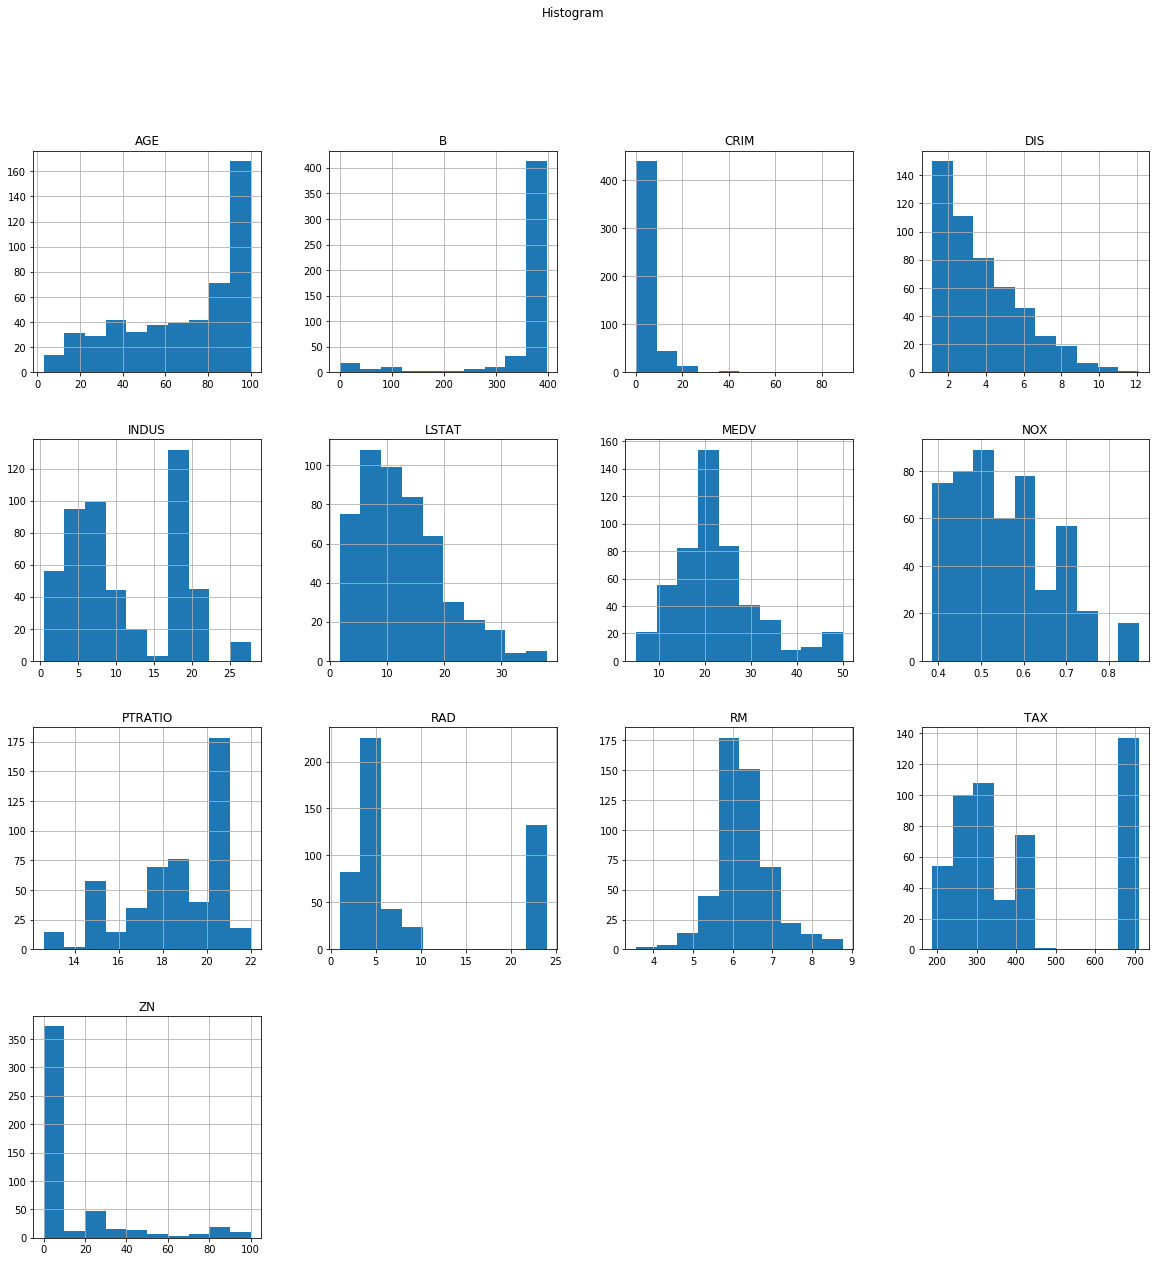

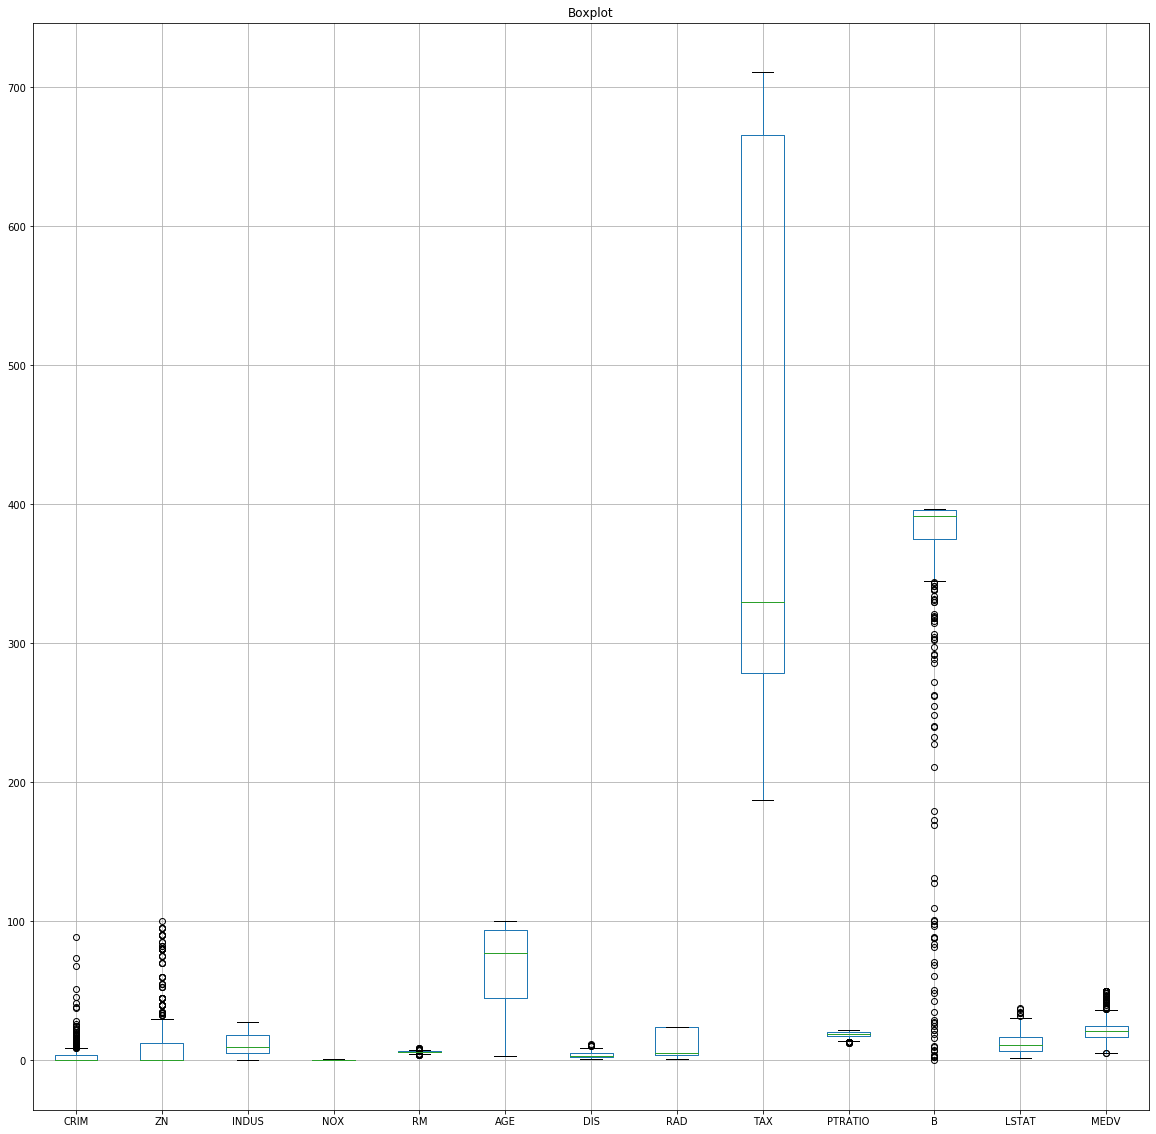

In [113]:
plt.rcParams['figure.figsize'] = (20,20)
boston_data.hist()
plt.suptitle('Histogram')
plt.show()

boston_data.boxplot()
plt.title('Boxplot')
plt.show()

# Conclusion #1

AGE: There are people who still live in house built prior to 1940. And we can see the graph shows negatively skewed data where mean < median.

DIS: There are more house with weighted distances between one and two Boston employment centre. And we can see the graph shows positively skewed data where mean > median.

LSTAT: There are much lower status of the population. And we can see the graph shows positively skewed data where mean > median.

MEDV: The graph almost shows a symmetric histogram of Median value of owner-occupied homes. Where the mean = median

RM: There are more house with six rooms per dwelling. The graph shows a symmetric histogram where the mean = median

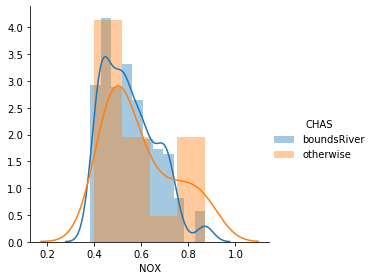

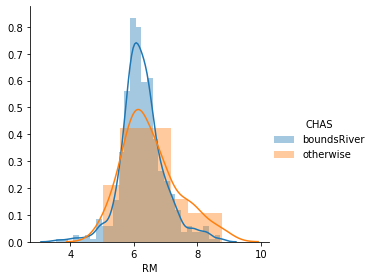

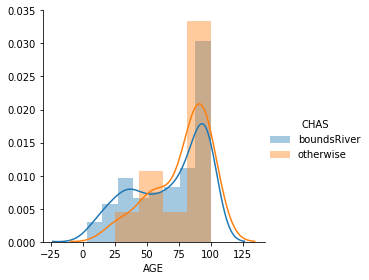

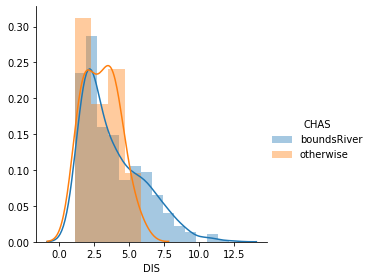

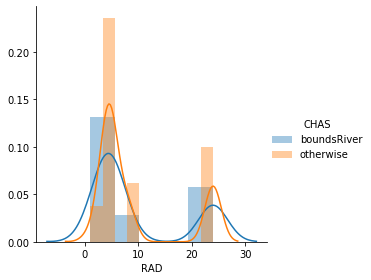

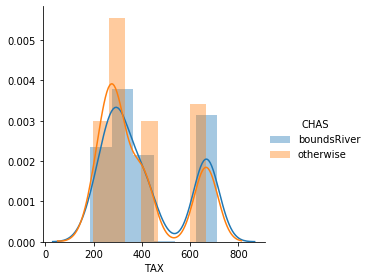

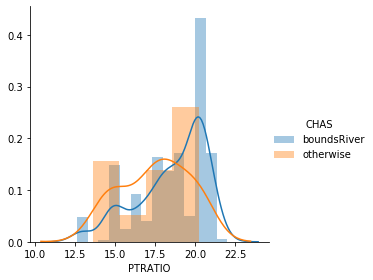

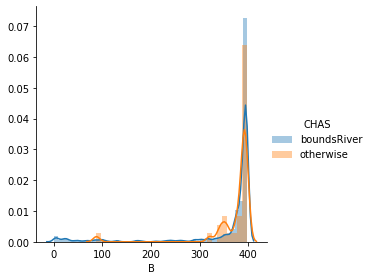

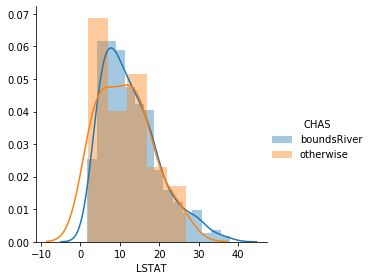

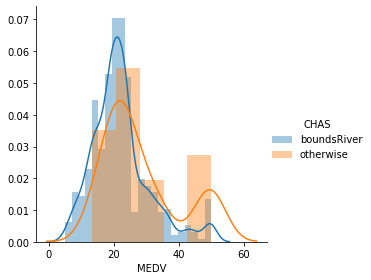

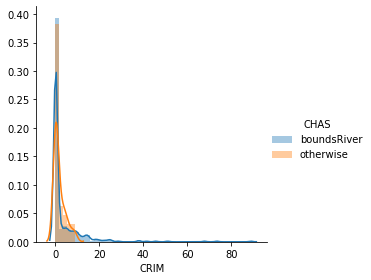

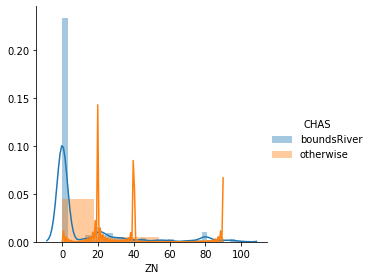

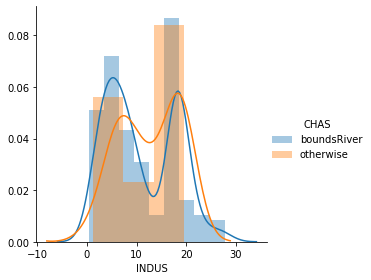

In [151]:
for column in boston_data.columns[:13]:
    g = sns.FacetGrid(boston_data, hue='CHAS', height = 4)
    g = g.map(sns.distplot, column)
    g = g.add_legend()
    plt.show()

## Conclusion #2
We can see the tax from bounRiver is bigger than the tax from otherwise. Is true that we have little data from 'otherwise', but we also can say live near the river is expensive.

We can see much black people live near the river.

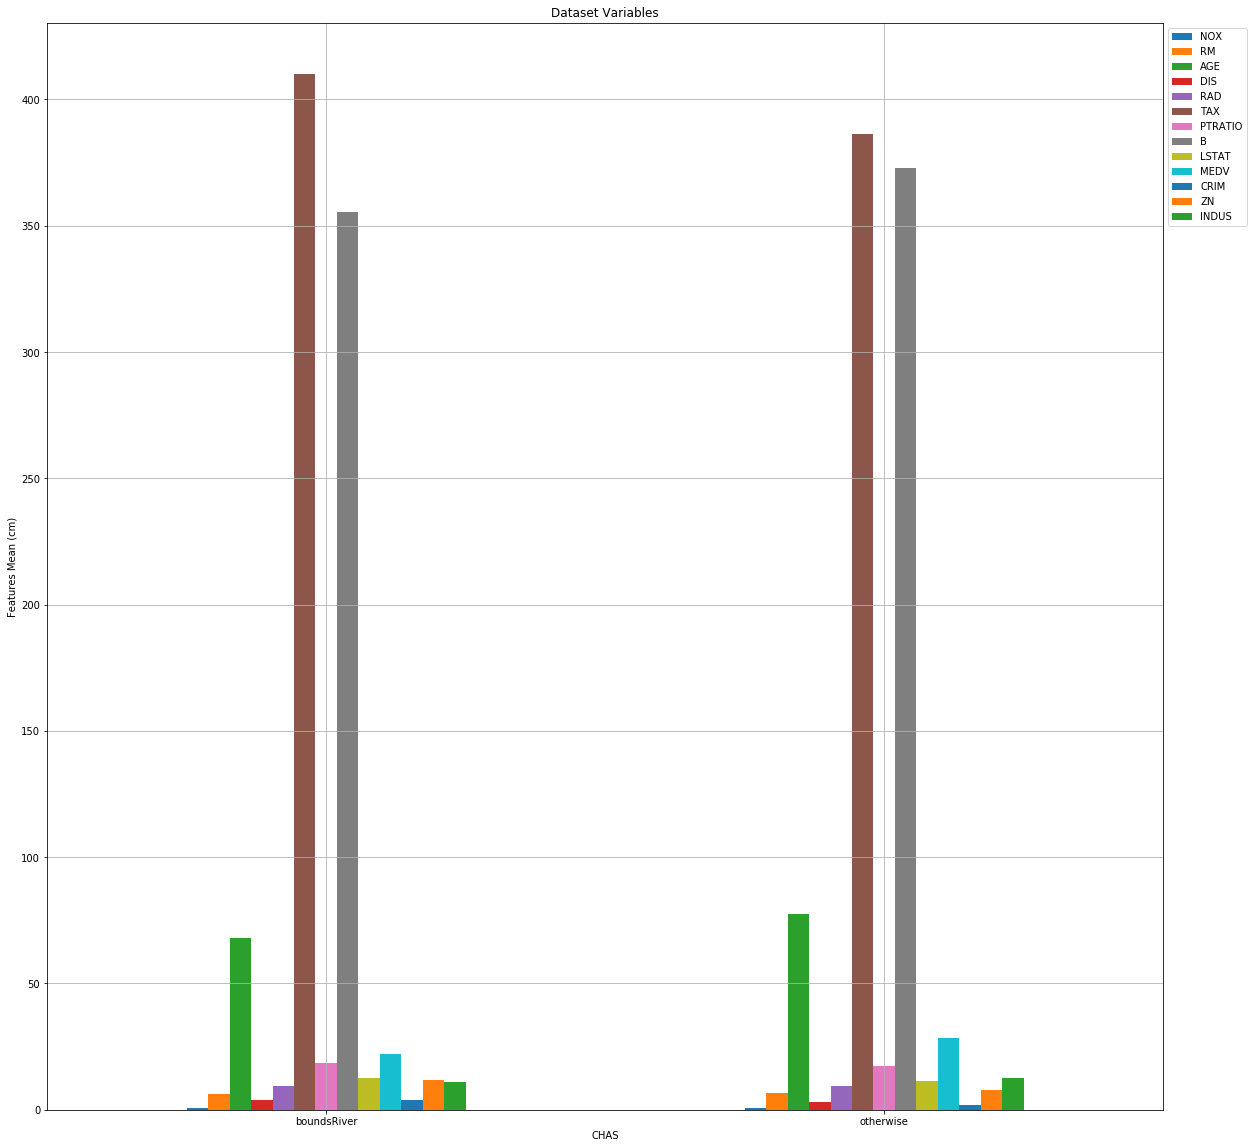

In [152]:
boston_data.groupby(by ='CHAS').mean().plot(kind = 'bar')

plt.title('Dataset Variables')
plt.ylabel('Features Mean (cm)')
plt.xticks(rotation = 0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

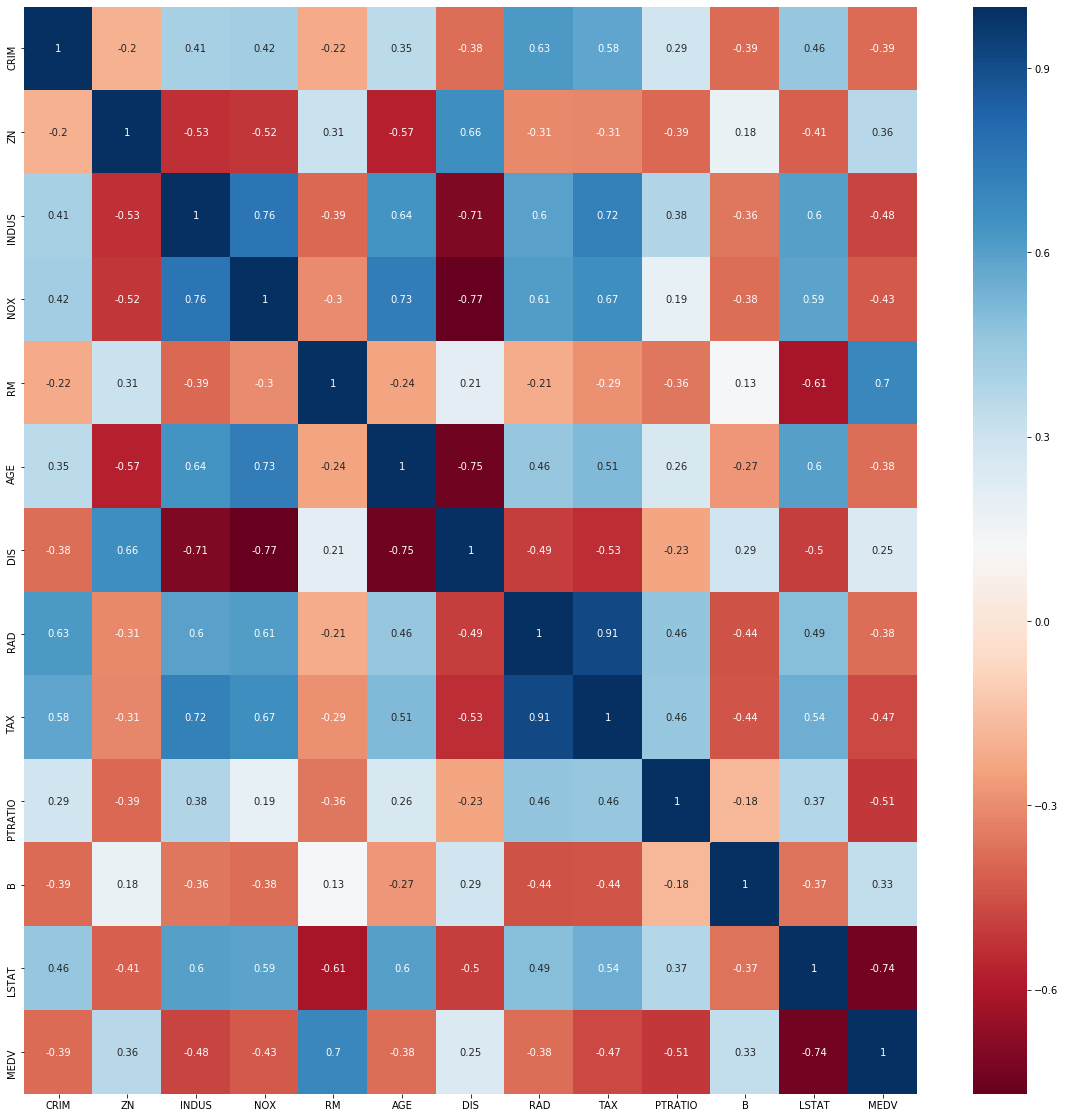

In [115]:
# Correlation Matrix
correlation_matrix = boston_data.corr()
# Heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', annot = True)
plt.show()

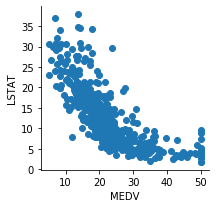

In [159]:
g = sns.FacetGrid(boston_data)
g = g.map(plt.scatter, 'MEDV', 'LSTAT')
g = g.add_legend()
plt.show()

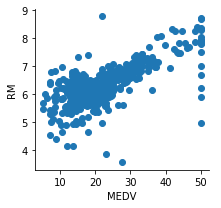

In [160]:
g = sns.FacetGrid(boston_data)
g = g.map(plt.scatter, 'MEDV', 'RM')
g = g.add_legend()
plt.show()

## Conclusion #3

From the column MEDV with got two good correlations. The fisrt one is MEDV with LSTAT and teh second one is MEDV with RM.

The first one is a negative correlation and it wants us say if there are more lower status in a specific place the value of owner-occupied homes in $1000's decreases.

The second one is a positive correlation and it wants us say if the are a lot of rooms in a house the value of owner-occupied homes in $1000's increases.